<a href="https://colab.research.google.com/github/barkamoljon/PortfolioProjects/blob/main/Tashkent_House_Price_Prediction%20%7C%20Practice_for_the_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1. ACTIVITY LEARNING

Let's start by creating an idea for a project.

Suppose our order contains a request to create a model (program) that calculates the average price of houses in different regions for the organization Tashkent LLC.

Information provided to you: Information from uybor.uz in the city of Tashkent

So, your task is to create a model (program) that determines the median price of houses in different areas based on the above data.
1.1 Understanding the processes

The first thing we do is collect more information about the project. This will help you approach the project correctly, choose the right model, and determine which algorithms to use.

For example, the first question: Where is this model used? The client said that the output of your model, along with other data that you don't know, will be fed back to the input of another model, and the final model will decide whether to invest in the specified area or not.

So our model is connected to the larger model.

Next question: What method is currently used by the buyer to determine the median price, how accurate is the current method, and what are its shortcomings?

Answer: through uybor.uz algorithms, the accuracy of the current method is unknown.

Now let's move on to the next step.


#### 1.2 Definition of the analytical approach
At this point, we can clear up a few things:
- Model: supervised, unsupervised, reinforcements?
- Algorithm: classification, regression or other type
- Method: online or offline

Let's answer the questions above:
1. Supervised learning - the reason is that we have a label in the data. This is the average price in the area. We want to predict exactly this price.
2. Regression. We said that the "prediction" (forecast) is solved using regression algorithms.
3. Offline - because the data has already been given to us once. There is no constant flow of data.

How do we evaluate the accuracy of a model?

There are different ways to estimate accuracy, but for regression algorithms, root mean square error (RMSE) is often used:

![RMSE](https://i.imgur.com/aXL9iWa.png)

Here:
- $m$ - number of rows in the data set (each row represents one piece of information)
- $x^{(i)}$ - vector of all parameters for $i$-string (except _label_)
- $y^{(i)}$ - label for $i$-row (average house price in our example)
- $X$ - all parameters except label
- $h$ is the prediction (hypothesis) returned by your model.
- $h(x^{(i)})$ is the prediction returned by the model for the $i$-row.
    
Another way to evaluate accuracy is the mean absolute error (MAE).

![MAE](https://i.imgur.com/GJH9CGy.png)

Both RMSE and MAE compute the difference between two vectors, a predictor and a label. The smaller the error, the better the result.

Before proceeding to the next step, let us confirm the above conclusions. This is because your regression model returns a specific number (the predicted price of the house), but the client expected you to give values like "expensive", "cheap", "medium" instead of a number. This has to be solved with a classification algorithm. In this way, we can make sure that the result you get from your model will be the same as the result the customer expects.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
Defining columns
- “location” - is the address of the house for sale.
- `district' - the area in which the house is located
- `rooms' - number of rooms
- `size' - area of the house (sq.m)
- `level' - the floor on which the house is located
- `max_levels` - total number of levels
- `price` - house price



### STEP 1. ACTIVITY TRAINING

Let's start by creating an idea for a project.

Our practice is to identify houses in the city of Tashkent.

Information provided to you: information obtained from the site uybor.uz.


**So, our task is to create a model (program) that determines the cost of houses in different regions based on the above information**

#### 1.1 Understanding processes

In fact, our first task is to collect more information about the project, we do not need it now, because we have enough information.

## Cleaning Data

### 2.1 Loading Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


Conclusions from the above result:
1. The dataset consists of 7655 rows.
2. All columns are filled.
3. "size" and "price" are numeric columns. Therefore, we can transpose them into numeric columns.
4. Text columns "district", "location".

In [ ]:
# find 'Площадьземли:1сот' value
df[df['size']=='Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [ ]:
# Drop it
df.drop(5347, inplace=True)

In [ ]:
#We convert size column to int
df['size'] = df['size'].to_numpy().astype(float)
df['size'] = df['size'].to_numpy().astype(int)

In [ ]:
#drop price
#df['price'] = df['price'].to_numpy().astype(float)

In [ ]:
# Drop 'Договорная' 
df.drop(df[df['price']=='Договорная'].index, inplace=True)

In [ ]:
# We will do the above work in `price` column as well
df['price'] = df['price'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7465 non-null   object
 1   district    7465 non-null   object
 2   rooms       7465 non-null   int64 
 3   size        7465 non-null   int64 
 4   level       7465 non-null   int64 
 5   max_levels  7465 non-null   int64 
 6   price       7465 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 466.6+ KB


In [ ]:
# we drop unusual values
df.drop(df[df['price'] > 175000].index, inplace=True)
df.drop(df[df['price'] < 10000].index, inplace=True)
df.drop(df[df['size'] > 250].index, inplace=True)
df.drop(df[df['size'] < 15].index, inplace=True)
df.drop(df[(df['size']<20) & (df['rooms']!=1)].index, inplace=True)
df.drop(df[(df['size']<30) & (df['rooms']>2)].index, inplace=True)

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000
mean,2.570638,69.673447,3.688944,5.990314,53556.539090
std,1.022626,27.981725,2.227596,2.583542,28178.387922
min,1.000000,15.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,34750.000000
50%,2.000000,65.000000,3.000000,5.000000,45500.000000
75%,3.000000,82.000000,5.000000,9.000000,65000.000000
max,8.000000,246.000000,18.000000,25.000000,175000.000000


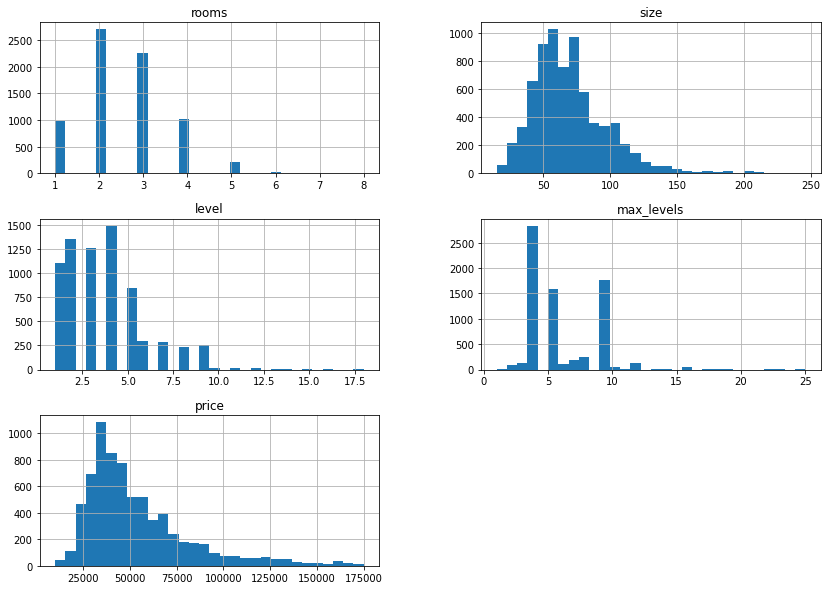

In [ ]:
%matplotlib inline
df.hist(bins=30, figsize=(14,10))
plt.show()

### 2.2 Trains and Test set.
In fact, it may seem too early in the data analysis phase, but the goal here is to prevent not only the computer but also us from making the wrong conclusion.

As we planned earlier, we allocate 80\% of the data for training and 20\% for testing. For this, we refer to the ready-made `train_test_split` function in `scikit-learn`.

We give the function dataset (`df'), test set size (0.2 i.e. 20%) and value for random number generator (`random_seed') as parameters.

The function of **`random_seed`** is to always get the same random values when running `train_test_split`. This ensures that `test_set` is always hidden during ML model building.




In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=0.2, random_state=54)

In [ ]:
train_set

,location,district,rooms,size,level,max_levels,price
6600,"город Ташкент, Учтепинский район, Чиланзар 24-...",Учтепинский,4,100,9,9,52000
2466,"город Ташкент, Мирабадский район, Миробод",Мирабадский,3,105,5,9,110000
3740,"город Ташкент, Учтепинский район, Чиланзар ква...",Учтепинский,1,42,2,4,25700
6549,"город Ташкент, Мирзо-Улугбекский район, Ахмад ...",Мирзо-Улугбекский,2,50,5,9,27511
5557,"город Ташкент, Чиланзарский район, Чиланзар 16...",Чиланзарский,2,47,4,4,29500
...,...,...,...,...,...,...,...
3546,"город Ташкент, Юнусабадский район, Юнусабад 6-...",Юнусабадский,3,105,4,6,66455
3996,"город Ташкент, Чиланзарский район, Чиланзар 1 ...",Чиланзарский,3,87,2,4,70000
5399,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,1,37,3,4,26000
4044,"город Ташкент, Шайхантахурский район, Ипакчи",Шайхантахурский,5,150,2,2,138000


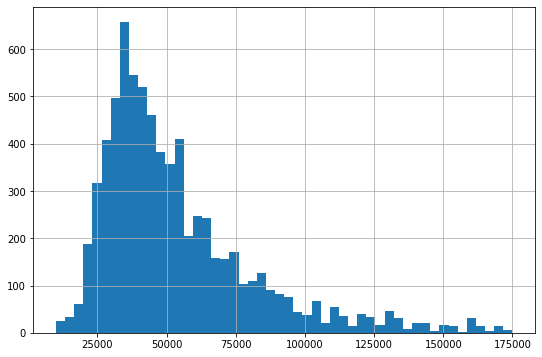

In [ ]:
%matplotlib inline
df['price'].hist(bins=50, figsize=(9,6))
plt.show()

Before using `StratifiedShuffleSplit`, we need to split the values in the `median_income` column into several categories. These categories are passed to the split function in `StratifiedShuffleSplit`, and the function balances the train and test set based on these categories.

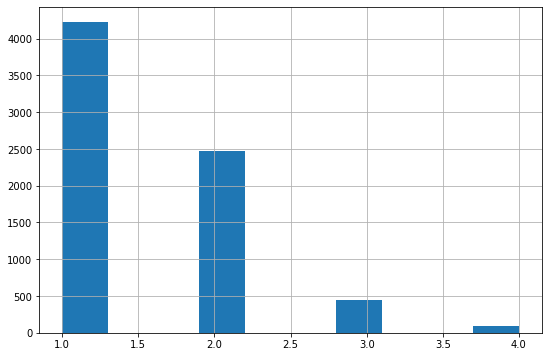

In [ ]:
df['price_cat'] = pd.cut(df['price'], bins=[ 0,50000, 100000,150000,200000,250000,300000,350000, np.inf], labels=[1,2,3,4,5,5.25,6,7])
df['price_cat'].hist(figsize=(9,6))
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit (n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df, df['price_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [ ]:
strat_train_set.drop('price_cat', axis=1, inplace=True)
strat_test_set.drop('price_cat', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 2.3 We analyze the data.

Now let's go directly to the data analysis. As you remember, we now have to work with the `train` set. We currently have 2 separate train sets:
- `train_set` - split (unbalanced) using `train_test_split`
- `strat_train_set` - Split using `StratifiedShuffleSplit`.

We use the second set. For convenience, we copy in this set.

In [ ]:
housing = strat_train_set.copy()

### Vizualitation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

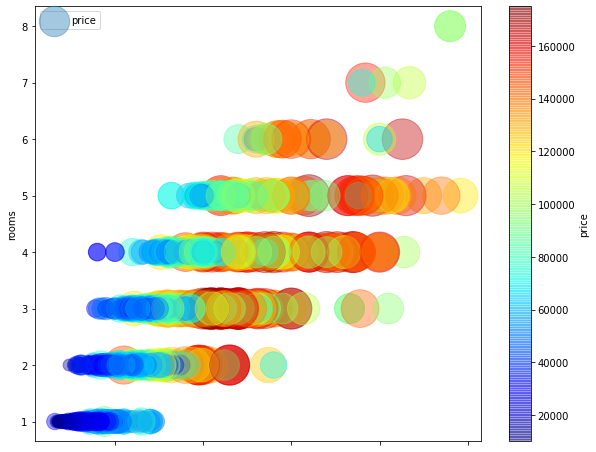

In [ ]:
housing.plot(
kind='scatter',
x='size',
y='rooms',
alpha=0.4,
s=housing['price']/100,# nuqta radiusi aholi soniga qarab o'zgaradi
label='price',
c= 'price', # nuqta rangi uyning narxiga qarab o'zgaradi
cmap='jet', # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
colorbar=True,
figsize=(10,8)
)
plt.show()

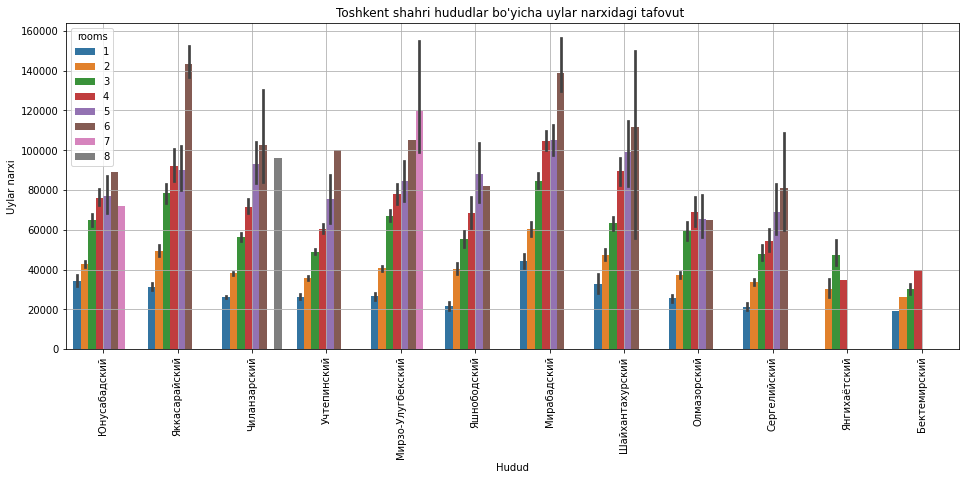

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.district, y=df['price'], hue=df['rooms'])

plt.title("Toshkent shahri hududlar bo'yicha uylar narxidagi tafovut ")
plt.xlabel('Hudud')
plt.ylabel('Uylar narxi')
plt.xticks(rotation=90)
plt.grid()
plt.show()

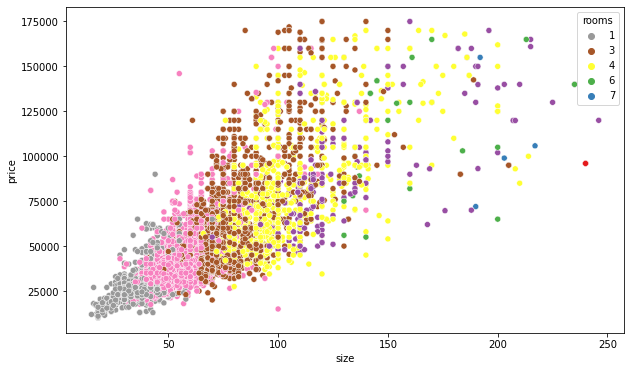

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['size'], y=df['price'], hue='rooms', palette='Set1_r')
plt.show()

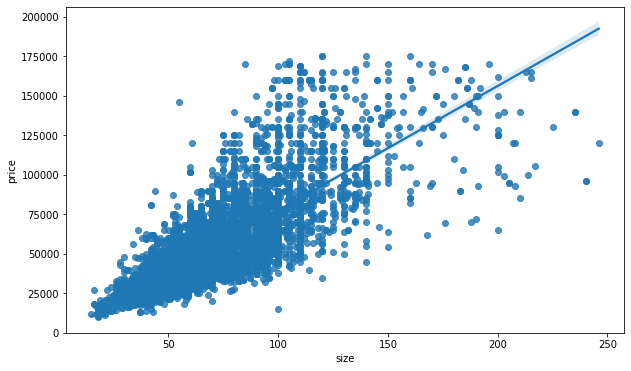

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(y=df['price'], x=df['size'])
plt.show()

### Correlation

In [ ]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
size          0.784989
rooms         0.606246
max_levels    0.254820
level         0.070034
dtype: float64

We can see that the correlation between `price` and `size`, `rooms`, `max_level` columns is relatively strong.

Also output the correlation values graphically using the `pairplot` function in `seaborn`.



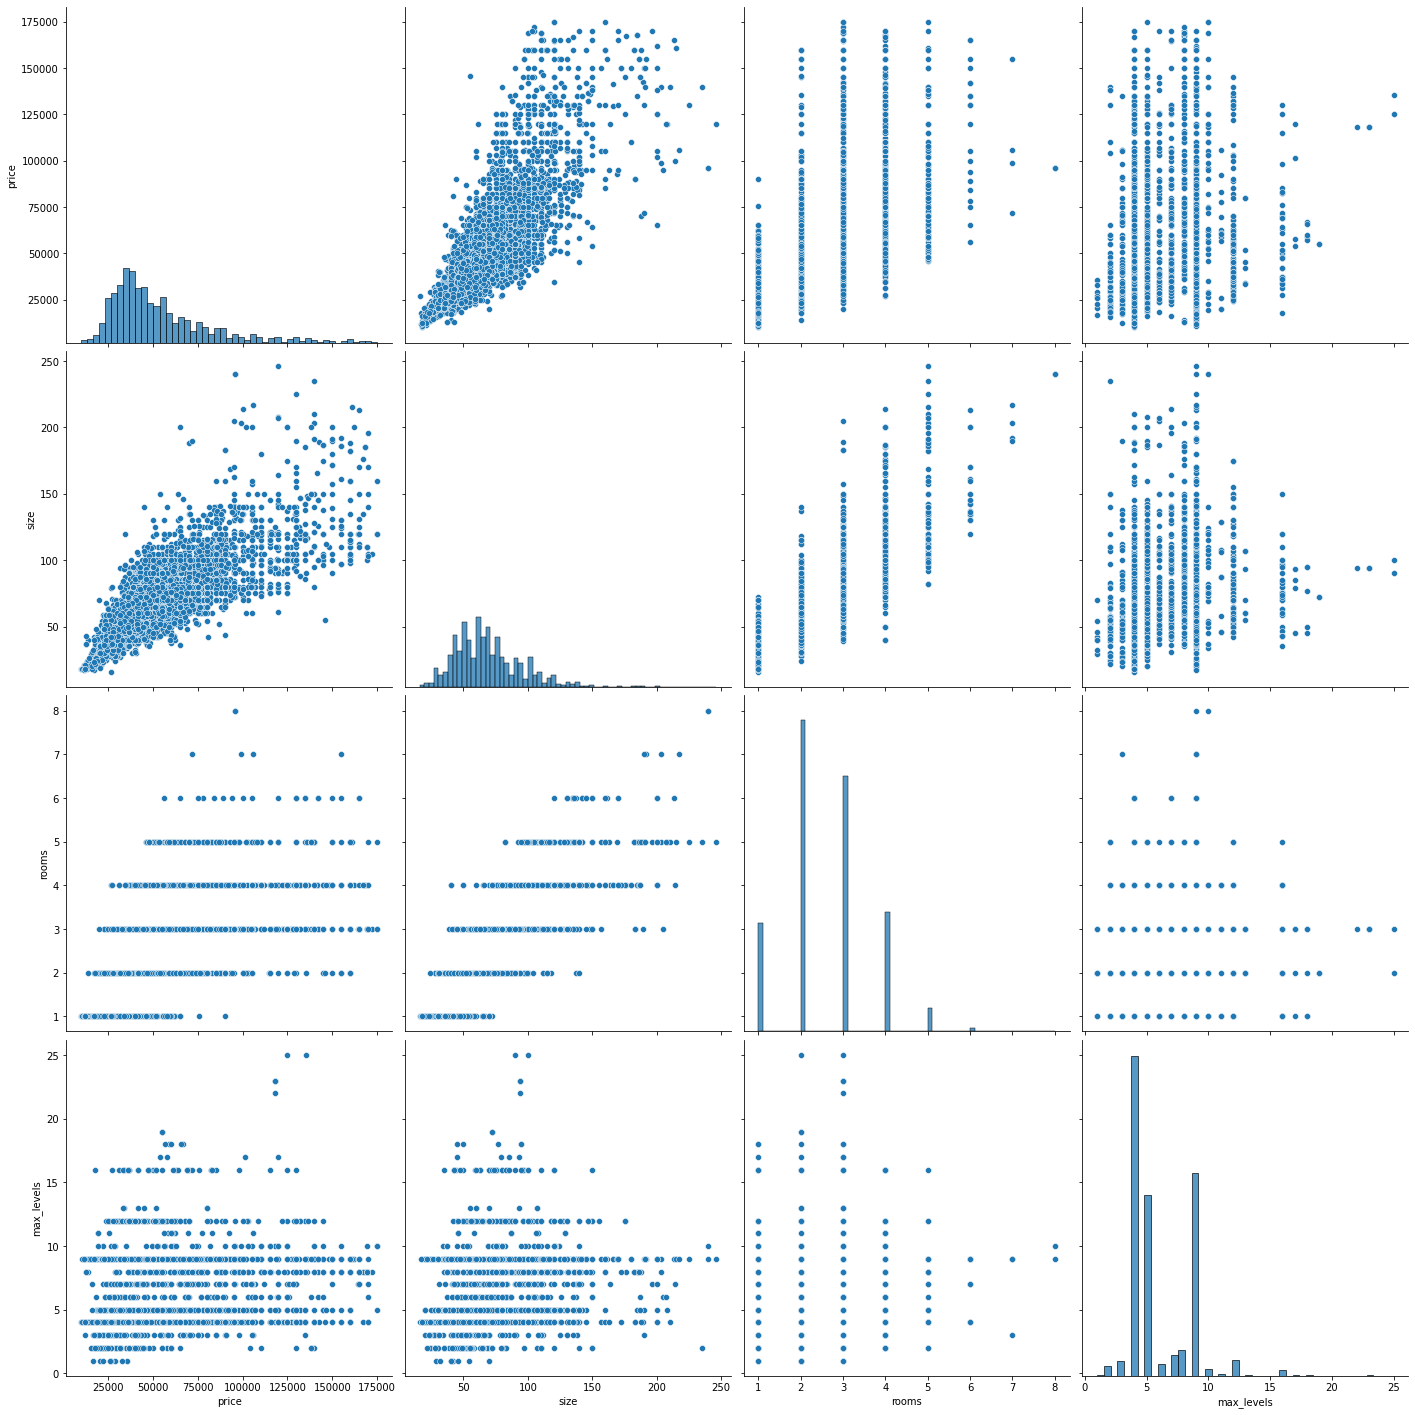

In [ ]:
cols = ['price' , 'size' , 'rooms', 'max_levels']
sns.pairplot(housing[cols], height=5)
plt.show()

Since the correlation between price and size is the strongest among all columns, let's plot it separately.

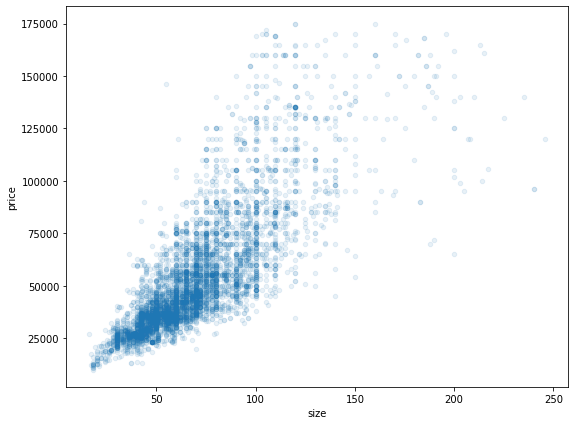

In [ ]:
housing.plot(kind='scatter', x='size', y='price', alpha=0.1, figsize=(9,7))
plt.show()

We can see that there is a strong correlation in the graph. That is, as the income of the population in the region has increased, the prices in the region have also increased. 

## 3-QADAM. Preparing data for Machine Learning
The next big step is preparing the data for ML. In the previous steps, we directly processed the data and analyzed them. We got some useful conclusions for ourselves.
In general, we have formulated a demand for information. It is time to prepare data based on these requirements.

To do this, we now work with the data not directly, but through functions. That is, we will automate all the processes performed in the previous part with the help of functions.
The purpose of doing this is that in the future, when processing new data, we can make the data look like we need by running a ready-made function.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
print(df.head())
df.drop(5347, inplace=True)
df['size'] = df['size'].astype(float)
df['size'] = df['size'].astype(int)
df.drop(df[df['price']=='Договорная'].index, inplace=True)
df.price = df['price'].astype(int)
df.drop(df[df['size']>200].index, inplace=True)
df.drop(df[df['size']<15].index, inplace=True)
df.drop(df[df['price']<10000].index, inplace=True)
df.drop(df[df['price']>175000].index, inplace=True)
df.drop(df[(df['size']<20) & (df['rooms']!=1)].index, inplace=True)
df.drop(df[(df['size']<30) & (df['rooms']>2)].index, inplace=True)


                                            location       district  rooms  \
0  город Ташкент, Юнусабадский район, Юнусабад 8-...   Юнусабадский      3   
1  город Ташкент, Яккасарайский район, 1-й тупик ...  Яккасарайский      2   
2  город Ташкент, Чиланзарский район, Чиланзар 2-...   Чиланзарский      2   
3  город Ташкент, Чиланзарский район, Чиланзар 9-...   Чиланзарский      3   
4  город Ташкент, Чиланзарский район, площадь Актепа   Чиланзарский      3   

  size  level  max_levels  price  
0   57      4           4  52000  
1   52      4           5  56000  
2   42      4           4  37000  
3   65      1           4  49500  
4   70      3           5  55000  


# **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.25 , random_state = 54)

X_train =train_set.drop('price', axis=1)
y=train_set['price'].copy()

X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

X_num =X_train.drop(columns=['district','location'], axis=1)

# **Pipeline**

### Numeric values 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])


###Categorical values and full Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_attribs = list(X_num)
loc_cat_attribs = ['location']
dis_cat_attribs = ['district']

full_pipeline = ColumnTransformer([
   ('num', num_pipeline, num_attribs),
   ('loc', OrdinalEncoder(), loc_cat_attribs),
   ('dis', OneHotEncoder(), dis_cat_attribs)                              
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

array([[ 0.42347792, -0.04550539,  2.36524824, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42347792,  0.40745338, -1.19865509, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56226634, -1.10240918, -0.75316717, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.56226634, -1.02691605, -0.30767926, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.40922218,  0.5961862 , -0.30767926, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.40922218,  1.5398503 ,  1.47427241, ...,  0.        ,
         0.        ,  1.        ]])

# **Machine Learning**

## **LinearRegression**

---

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_prepared, y)


LinearRegression()

In [ ]:
# Preparing & Predict
X_test_prepared = full_pipeline.fit_transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({"Original price": y_test, "Predict":y_predicted})

,Asl narxi,Prognoz
6745,88000,87033.423969
3827,55000,46836.313899
7096,26000,18936.096203
3336,95000,82657.939726
1529,44500,46108.788828
...,...,...
3913,29000,39423.488404
2034,46000,48499.118660
212,34500,35049.454577
1225,58000,46365.197664


### Modelni evalution
`LR_model`

---


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE LR_model =', mae(y_test, y_predicted))
print('RMSE LR_model =', np.sqrt(mse(y_test, y_predicted)))

MAE LR_model = 11402.750714732514
RMSE LR_model = 17268.419728741268


# **DecisionTree**

---

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()


In [ ]:
#Model Training
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [ ]:
#Predict
y_predicted = Tree_model.predict(X_test_prepared) 

In [ ]:
pd.DataFrame({"Original price": y_test, "Predict":y_predicted})

,Asl narxi,Prognoz
6745,88000,80000.0
3827,55000,52000.0
7096,26000,27000.0
3336,95000,70000.0
1529,44500,75000.0
...,...,...
3913,29000,39000.0
2034,46000,107500.0
212,34500,37000.0
1225,58000,53000.0


### Modelni evalution
`Tree_model`

---

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE LR_model =', mae(y_test, y_predicted))
print('RMSE LR_model =', np.sqrt(mse(y_test, y_predicted)))

MAE LR_model = 14449.732149463558
RMSE LR_model = 22044.097913040077


## **RandomForest**

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

In [ ]:
# Model training
RF_model.fit(X_prepared, y)


RandomForestRegressor()

In [ ]:
#Pedict
y_predicted = RF_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({"Original price": y_test, "Predict":y_predicted})

,Asl narxi,Prognoz
6745,88000,89646.350000
3827,55000,53553.000000
7096,26000,25234.000000
3336,95000,84520.493333
1529,44500,55705.000000
...,...,...
3913,29000,45980.000000
2034,46000,59849.652222
212,34500,37083.278571
1225,58000,57630.000000


### Modelni evalution
`RF_model`

---

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error
mse = mean_squared_error

In [ ]:
print('MAE RF_model =', mae(y_test, y_predicted))
print('RMSE RF_model =', np.sqrt(mse(y_test, y_predicted)))

MAE RF_model = 11135.534678319971
RMSE RF_model = 16504.272918877312


# **Evaluation by the method of Cross-Validation**

Above, we split the data into test and train sets for model evaluation.
The disadvantage of this method is that we always use the same data for testing and training.

With cross-validation, we can divide the data into several parts and train and test the model several times using different parts.

For example, the figure below shows training and testing by dividing the data by 5.

![](https://www.oreilly.com/library/view/machine-learning-quick/9781788830577/assets/b90b29ab-dfe7-4c11-9a2f-321e84f79495.png)

# **Cross-Validation**

For cross validation, it is not necessary to divide the data into train and test, it is done by sklearn itself.

In [ ]:
from sklearn.model_selection import cross_val_score
X = df.drop("price", axis=1)
y = df['price'].copy()
 
X_prepared = full_pipeline.fit_transform(X)

We can create a simple function to display the validation results

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Srd.dev:', scores.std())

## **LinearRegression**



In [ ]:
scores = cross_val_score(LR_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [14286.96697964 14620.6016943  17533.62873611 16525.05709081
 17574.96184924 18255.04684441 14813.89328218 14649.11689998
 15121.09033679 15270.06250882]
Mean: 15865.042622227673
Srd.dev: 1392.3201950512505


# **Decision Tree**

In [ ]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [16258.80952985 16795.03458513 19795.73918496 19379.4276564
 19476.04539733 18752.0372334  18586.37345245 15728.36016488
 17715.93514998 14720.00482156]
Mean: 17720.776717594712
Srd.dev: 1670.8992178122762


## **RandomForest**

In [ ]:
scores = cross_val_score(RF_model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(LR_rmse_scores)

Scores: [11405.04116297 12575.66548489 14956.37787022 14650.01940386
 14642.73313483 14029.89874943 13054.51732809 11722.55384542
 12941.41269989 12324.58165034]
Mean: 13230.28013299345
Srd.dev: 1208.1957334084213


# Save with **Joblib** 

In [ ]:
import joblib 
filename = 'LR_model.jbl'
joblib.dump(LR_model, filename)

['LR_model.jbl']

In [ ]:
import joblib 
filename = 'RF_model.jbl'
joblib.dump(RF_model, filename)

['RF_model.jbl']